# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

### Answer: 
The gradient of this function $f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2$ is
$$
g^T = 
\begin{bmatrix}
4x_{1} - 4x_{2}\\
-4x_{1} + 3x_{2} + 1\\
\end{bmatrix}
$$
then we can have the Hessian martix, which is
$$
H = 
\begin{bmatrix}
4&-4\\
-4&3\\
\end{bmatrix}
$$
Let's calculate the eigenvalue for the Hessian matrix, which is $\lambda_{1} = \frac{-7+\sqrt{65}}{2}$ and $\lambda_{2} = \frac{-7-\sqrt{65}}{2}$. It shows that one eigenvalue is positive, the other is negative. So the stationary point of this function is a saddle point.

Use Tanlor's expansion to expand the function, we can have ($x_{0}$is the saddle point)
$$
f(x) = f(x_{0}) + g^T(x_{0})(x-x_{0})+\frac{1}{2}(x-x_{0})^T H (x-x_{0})
$$
We also know that $g^T(x_{0}) = 0$ and $f(x)-f(x_{0})=\frac{1}{2}(x-x_{0})^T H (x-x_{0})$, we let $\Delta x_1 = x_1 - x_0, \Delta x_2 = x_2 - x_0$

Decompose the expression $f(x)-f(x_{0})=\frac{1}{2}(x-x_{0})^T H (x-x_{0})$, we can have 
$$
f(x)-f(x_{0})=\frac{1}{2}(2\Delta x_1 - 3\Delta x_2)(2\Delta x_1 - \Delta x_2)
$$

The downslopes should meet $f(x)-f(x_{0}) < 0$. So we can have that $2\Delta x_1 - 3\Delta x_2 < 0$ or $2\Delta x_1 - \Delta x_2 < 0$, which is the downslope direction away from the saddle. Plug the saddle point into the above expression, we can have that $2(x_1 - 1) - 3(x_2 - 1) < 0$ or $2(x_1 - 1) - (x_2 - 1) < 0 \Rightarrow 2x_1 - 3x_2 +1 < 0$ or $2x_1 - x_2 -1 < 0$

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

### Answer:
We minimize the distance between point in the plance and point $(-1, 0, 1)^T$ with the constraint
$$
\begin{aligned}
&\text{minimize:} && (x_1+1)^2+x_2^2+(x_3-1)^2\\
&\text{subject to:} && x_1 + 2x_2 + 3x_3 = 1
\end{aligned}
$$

Let's convert the constraint as $x_1 = 1 - 2x_2 - 3x_3$, plug it into the minimized function:
$$
\begin{aligned}
&\text{minimize:} &&f=(2-2x_2-3x_3)^2+x_2^2+(x_3-1)^2=5x_2^2-8x_2+12x_2x_3-14x_3+10x_3^2+5\\
\end{aligned}
$$
We can calculate the Hessian matrix for the function $f$ and find
$$
H = 
\begin{bmatrix}
10&12\\
12&20\\
\end{bmatrix}
$$
The eigenvalue is $\lambda_1 = 28$ and $\lambda_2 = 2$, which shows that $H$ is positive definite matrix. From the Lemma, we know that function $f$ is convex.

[array([[0],
       [0]]), array([[0.0625  ],
       [0.109375]]), array([[0.10986328],
       [0.19580078]]), array([[0.14542389],
       [0.26428223]]), array([[0.17178619],
       [0.31872964]]), array([[0.19098449],
       [0.36219818]]), array([[0.20460775],
       [0.39707492]]), array([[0.21389699],
       [0.42522498]]), array([[0.2257459 ],
       [0.47098649]]), array([[0.22716314],
       [0.50022586]]), array([[0.22287655],
       [0.52006219]]), array([[0.20820431],
       [0.54894461]]), array([[0.124532  ],
       [0.61427662]]), array([[0.08599204],
       [0.62803184]]), array([[0.03645422],
       [0.67896418]]), array([[0.02045071],
       [0.67844123]]), array([[-0.02277453],
       [ 0.70166208]]), array([[-0.03478701],
       [ 0.71666537]]), array([[-0.05054416],
       [ 0.72192391]]), array([[-0.06039699],
       [ 0.73242714]]), array([[-0.08354146],
       [ 0.74195478]]), array([[-0.0856678 ],
       [ 0.74706109]]), array([[-0.09917469],
       [ 0.75791006

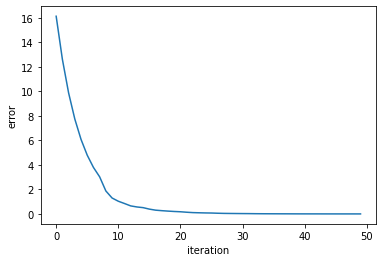

In [8]:
# This is the gradient descent algorithm
import numpy as np
import matplotlib.pyplot as plt

def obj(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

eps = 1e-3  # termination criterion
x0 = np.array([[0], [0]])  # initial guess
iter = 0  # counter
soln = [x0]  # use an array to store the search steps
x = soln[iter]  # start with the initial guess
error = np.linalg.norm(grad(x), ord=2)

error_list = list()
iter_list = list()
error_list.append(error)
iter_list.append(iter)

def line_search(x):
    a = 1.  # initialize step size
    phi = lambda a, x: obj(x) - a * 0.8 * np.matmul(grad(x).T, grad(x))  # define phi as a search criterion
    while phi(a, x) < obj(x - a * grad(x)):  # if f(x+a*d)>phi(a) then backtrack. d is the search direction
        a = 0.5 * a
    return a

while error >= eps:  # keep searching while gradient norm is larger than eps
    a = line_search(x)
    x = x - a * grad(x)
    soln.append(x)
    error = np.linalg.norm(grad(x), ord=2)
    iter += 1
    error_list.append(error)
    iter_list.append(iter)

print(soln)  # print the search trajectory
print('The point in the plane is', 'x1 =', 1-2*soln[-1][0]-3*soln[-1][1], 'x2 =', soln[-1][0], 'x3 =', soln[-1][1])
plt.plot(iter_list, error_list)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

[array([[0],
       [0]]), array([[-0.07142857],
       [ 0.39285714]]), array([[-0.10714286],
       [ 0.58928571]]), array([[-0.125 ],
       [ 0.6875]]), array([[-0.13392857],
       [ 0.73660714]]), array([[-0.13839286],
       [ 0.76116071]]), array([[-0.140625 ],
       [ 0.7734375]]), array([[-0.14174107],
       [ 0.77957589]]), array([[-0.14229911],
       [ 0.78264509]]), array([[-0.14257812],
       [ 0.78417969]]), array([[-0.14271763],
       [ 0.78494699]]), array([[-0.14278739],
       [ 0.78533064]]), array([[-0.14282227],
       [ 0.78552246]]), array([[-0.1428397 ],
       [ 0.78561837]]), array([[-0.14284842],
       [ 0.78566633]])]
The point in the plane is x1 = [-1.07130214] x2 = [-0.14284842] x3 = [0.78566633]


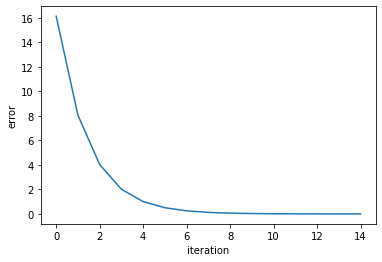

In [7]:
# This is the Newton algorithm
import numpy as np
import matplotlib.pyplot as plt

def obj(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

eps = 1e-3  # termination criterion
x0 = np.array([[0], [0]])  # initial guess
iter = 0  # counter
soln = [x0]  # use an array to store the search steps
x = soln[iter]  # start with the initial guess
error = np.linalg.norm(grad(x), ord=2)

H = np.array([[10, 12], [12, 20]])  # define the Hessian matrix
a = 0.5  # set a fixed step size to start with

error_list = list()
iter_list = list()
error_list.append(error)
iter_list.append(iter)

while error >= eps:  # keep searching while gradient norm is larger than eps
    x = x - a * np.matmul(np.linalg.inv(H), grad(x))
    soln.append(x)
    error = np.linalg.norm(grad(x), ord=2)
    iter += 1
    error_list.append(error)
    iter_list.append(iter)

print(soln)  # print the search trajectory
print('The point in the plane is', 'x1 =', 1-2*soln[-1][0]-3*soln[-1][1], 'x2 =', soln[-1][0], 'x3 =', soln[-1][1])
plt.plot(iter_list, error_list)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

### Answer:
Assume $\forall x_1, x_2 \in \mathcal{X}$, which has $x = \lambda x_1 +(1-\lambda)x_2$, $\lambda \in [0, 1]$. Let $h(x)=af(x)+bg(x)$ and we also know $f$ and $g$ is convex function. Then we have,
$$
\begin{aligned}
h(x)& =h(\lambda x_1 +(1-\lambda)x_2)\\ 
& \leq a(\lambda f(x_1) + (1 - \lambda) f(x_2)) + b(\lambda g(x_1) + (1 - \lambda) g(x_2))\\
& = \lambda(af(x_1)+bg(x_1)) + (1-\lambda)(af(x_2)+bg(x_2))\\ 
& = \lambda h(x_1) + (1-\lambda) h(x_2)
\end{aligned}
$$
Therefore, we can know that $h(x)=af(x)+bg(x)$ is the convex when $a>0$ and $b>0$.

Let $h(x) = f(g(x))$, we know that $h(x)=f(g(x))$ is convex, so we can have $h^{''}(x) \geq 0$. We also know that $h^{''}(x)=f^{''}(g(x))g^{'}(x)^2 + f^{'}(g(x))g^{''}(x)$. From the condition, $f^{''}\geq 0$ and $g^{''}\geq 0$ because $f$ and $g$ is convex function. Hence, if we want $h^{''}(x)=f^{''}(g(x))g^{'}(x)^2 + f^{'}(g(x))g^{''}(x) \geq 0$, it can find that $f^{'}(g(x)) \geq 0$, which means that $f$ should be non-decreasing function. 

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

### Answer:
We firstly prove that $f({\bf x}_1) \geq f(\textbf{x}_0) + \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ can derive that $f$ is convex function.
Let $\forall \textbf{z} \in \mathcal{X}$, which has $\textbf{z} = \lambda \textbf{x}_1 +(1-\lambda)\textbf{x}_0$, $\lambda \in [0, 1]$. Then we have
$$
\begin{aligned}
f(\textbf{x}_1) \geq f(\textbf{z}) + g^T(\textbf{z})(\textbf{x}_1-\textbf{z})\\
f(\textbf{x}_0) \geq f(\textbf{z}) + g^T(\textbf{z})(\textbf{x}_0-\textbf{z})
\end{aligned}
$$
Consider $\lambda f(\textbf{x}_1) + (1-\lambda)f(\textbf{x}_0)$, it is easy to know that
$$
\begin{aligned}
\lambda f(\textbf{x}_1)+ (1-\lambda)f(\textbf{x}_0) & \geq f(\textbf{z}) + g^T(\textbf{z})(\lambda \textbf{x}_1- \lambda \textbf{z} + (1-\lambda)\textbf{x}_0 - (1-\lambda)\textbf{z})\\
& = f(\textbf{z}) + g^T(\textbf{z})(\lambda \textbf{x}_1 + (1-\lambda)\textbf{x}_0 - \textbf{z})\\ 
& = f(\textbf{z})\\
& = f(\lambda \textbf{x}_1 +(1-\lambda)\textbf{x}_0)
\end{aligned}
$$
It shows that $f(\textbf{x})$ is the convex function

Next, we start to prove that convex function $f(\textbf{x})$ can derive $f({\bf x}_1) \geq f(\textbf{x}_0) + \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$.

From the definition of convex function, we can have
$$
\begin{aligned}
&f(\lambda \textbf{x}_1 + (1 - \lambda)\textbf{x}_0) \leq \lambda f(\textbf{x}_1) + (1-\lambda)f(\textbf{x}_0), \lambda \in [0, 1]\\
\Rightarrow & f(\lambda \textbf{x}_1 + (1 - \lambda)\textbf{x}_0) - f(\textbf{x}_0) \leq \lambda (f(\textbf{x}_1) - f(\textbf{x}_0))\\
\Rightarrow & \frac{f(\lambda \textbf{x}_1 + (1 - \lambda)\textbf{x}_0) - f(\textbf{x}_0)}{\lambda(\textbf{x}_1-\textbf{x}_0)}(\textbf{x}_1-\textbf{x}_0) \leq (f(\textbf{x}_1) - f(\textbf{x}_0))\\
\end{aligned}
$$
take the limit on both sides of inequality
$$
\begin{aligned}
\Rightarrow & \lim\limits_{\lambda\rightarrow 0}\frac{f(\lambda \textbf{x}_1 + (1 - \lambda)\textbf{x}_0) - f(\textbf{x}_0)}{\lambda(\textbf{x}_1-\textbf{x}_0)}(\textbf{x}_1-\textbf{x}_0) \leq \lim\limits_{\lambda\rightarrow 0}(f(\textbf{x}_1) - f(\textbf{x}_0))\\
\Rightarrow & g_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)\leq f(\textbf{x}_1)-f(\textbf{x}_0)\\
\Rightarrow & f(\textbf{x}_1) \geq f(\textbf{x}_0) + \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)
\end{aligned}
$$

Therefore, $f({\bf x}_1) \geq f(\textbf{x}_0) + \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0) \Leftrightarrow$ $f(\textbf{x})$ is convex function.

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

### Answer:

$$
\begin{aligned}
&\min_{p} \sum_{k}(\textbf{a}_k^T \textbf{p} - I_t)^2 \\\\
&s.t.: \textbf{p}=[p_1,...,p_n]^T
\end{aligned}
$$

We calculate the gradient of the objective function, which is 
$$
\begin{aligned}
\sum_{k} 2(\textbf{a}_k^T \textbf{p} - I_t)\textbf{a}_k
\end{aligned}
$$
Hessin materic H is
$$
\begin{aligned}
\sum_{k} 2\textbf{a}_k \textbf{a}_k^T
\end{aligned}
$$

Assum that there exists $\forall d \neq 0$, then we have 
$$
\begin{aligned}
d^THd & = \sum_{k} 2 d^T\textbf{a}_k \textbf{a}_k^Td\\
& = \sum_{k} 2\textbf{u}_k^T \textbf{u}_k\\
& \geq 0
\end{aligned}
$$
which $\textbf{a}_k^Td=\textbf{u}_k$. Then we know that the Hessian is positive semi-definition, the objective function is convex. We also know that the feasible domain for $\textbf{p}$ is convex. So the problem is convex.

From the condition, we know that the feasible domain has the constraint, which is the subspace of the $\textbf{p}$. But it is still the convex set. Go back to check the Hessian, if $d^THd=0$, it should meet that $\textbf{u}_k=\textbf{a}_k^Td=0 \Leftrightarrow d \bot \textbf{a}_k \Leftrightarrow \textbf{a}_k$ is the subspace of the feasible domain. In the current condition, we find that the length of $\textbf{a}_k$ is equal the entire space $n$, so the Hessian $d^THd>0$, which is Hessian is positive definite. Then the objective function is strictly convex, which has the unique solution.

When no more than half of the lamps are switched on, the length of $\textbf{a}_k$ is not the entire space $n$ but the subspace, then $\exists d$, it can make $d \bot \textbf{a}_k$. Hence, the Hessian can have $d^THd=0$, which means the Hessian is positive semi-definite, the objective function is convex, which has the solution, but not unique solution.